# Ticket Price Prediction using Regression

This is a tickets pricing monitoring system. It scrapes tickets pricing data periodically and stores it in a database. Ticket pricing changes based on demand and time, and there can be significant difference in price. I am creating this product mainly with ourselves in mind. Users can set up alarms using an email, choosing an origin and destination (cities), time (date and hour range picker) choosing a price reduction over mean price, etc.

**Data set**<br>
**Following is the description for columns in the dataset**<br>
- insert_date: date and time when the price was collected and written in the database<br>
- origin: origin city <br>
- destination: destination city <br>
- start_date: train departure time<br>
- end_date: train arrival time<br>
- train_type: train service name<br>
- price: price<br>
- train_class: ticket class, tourist, business, etc.<br>
- fare: ticket fare, round trip, etc <br>

# Importing dataset and Performing Summary statistics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# To show Matplotlib graphs in the same Jupyter notebook
%matplotlib inline 
# To set Seaborn default style as it is a bit pretty than Matplotlib default styles
sns.set() 

#### Import Dataset and create a copy of that dataset

In [2]:
data = pd.read_csv('data1.csv')
df = data.copy()

#### Display first five rows

In [3]:
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


#### Drop 'unnamed: 0' column
 The data set contains an 'unnamed: 0', i will first remove this as we don't have need of this column

In [4]:
# Droping the column and saving changes in the same dataframe
df = df.drop(['Unnamed: 0'],axis=1) 

#### Check the number of rows and columns

In [5]:
# shape is a dataframe attribute which shows the number of rows and columns
df.shape

(215909, 9)

#### Check data types of all columns

In [6]:
# dtypes is a dataframe attribute which shows data type of all columns
df.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

####  Check the basic summary statistics

In [7]:
df.describe()

,price
count,202321.000000
mean,56.723877
std,25.531787
min,16.600000
25%,28.350000
50%,53.400000
75%,76.300000
max,206.800000


#### Check summary statistics of all columns, including object dataypes

In [8]:
df.describe(include='all')

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,16,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


**Question: Explain the summary statistics for the above data set**

**Answer:**
 - The response variable here is the 'price'
 - Their is no enough differene between mean and median, therefore it is alomost symmetric but slightly right skewed
 - Minimum of price column is 16.60,maximum is 206.80, mean is 56.723 and median is 53.40
 - The people whose origin/destination was 'MADRID' existed the most in the data, and the train class 'Turista' is used the most
 - Most of the people used 'promo' for their journey

# Data Cleansing
  - Here we will fill null values with the mean  
  - Droping unnecessary columns  
  - Droping those rows/recoreds which contain some column missing vlues
  - Using Numpy and Pandas

#### Check null values in dataset

In [9]:
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

####  Filling the Null values in the 'price' column.

In [10]:
# First find the mean and then replace null values with it
mean = df['price'].mean() 
df['price'].fillna(mean, inplace=True)

**Check null values again in dataset**

In [11]:
# To ensure that the null values in price column filled with the mean
df['price'].isnull().sum()

0

#### Droping the rows containing Null values in the attributes 'train_class' and 'fare'

In [12]:
# Select and save those records which have null values in 'train_class' and 'fare' cloumn
df = df[~(df['train_class'].isnull() & df['fare'].isnull())]
df.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


In [13]:
# To ensure all the null values are gone
df.isnull().sum()

insert_date    0
origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

####  Drop 'insert_date' column
 

In [14]:
df.drop(['insert_date'], axis=1, inplace=True)

# Data Visualization
  Using Matpoltlib and Seaborn to see some useful visual insights

#### Plot number of people boarding from different stations


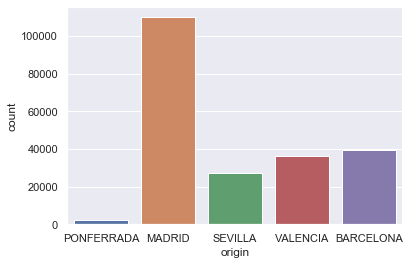

In [15]:
sns.countplot(x=df['origin'])

**Question: What insights do you get from the above plot?**

**Answer**
 - The people whose origin was 'Madrid' are more than one lac
 - The people whose origin was 'Ponferrada' are least in number
 - The people whose origin was 'Valencia' and 'Barcelona' are nearly equal in number

#### Plot number of people for the destination stations

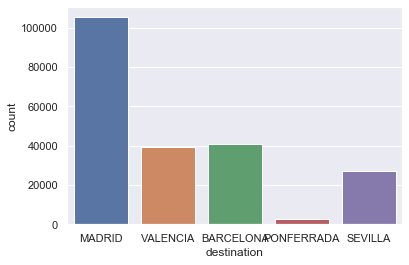

In [16]:
sns.countplot(x=df['destination'])

**Question: What insights do you get from the above graph?**

**Answer**
 - The people whose destination was 'Madrid' are more than one lac
 - The people whose destination was 'Ponferrada' are least in number
 - The people whose destination was 'Valencia' and 'Barcelona' are nearly equal in number

#### Plot different types of trains that runs in Spain

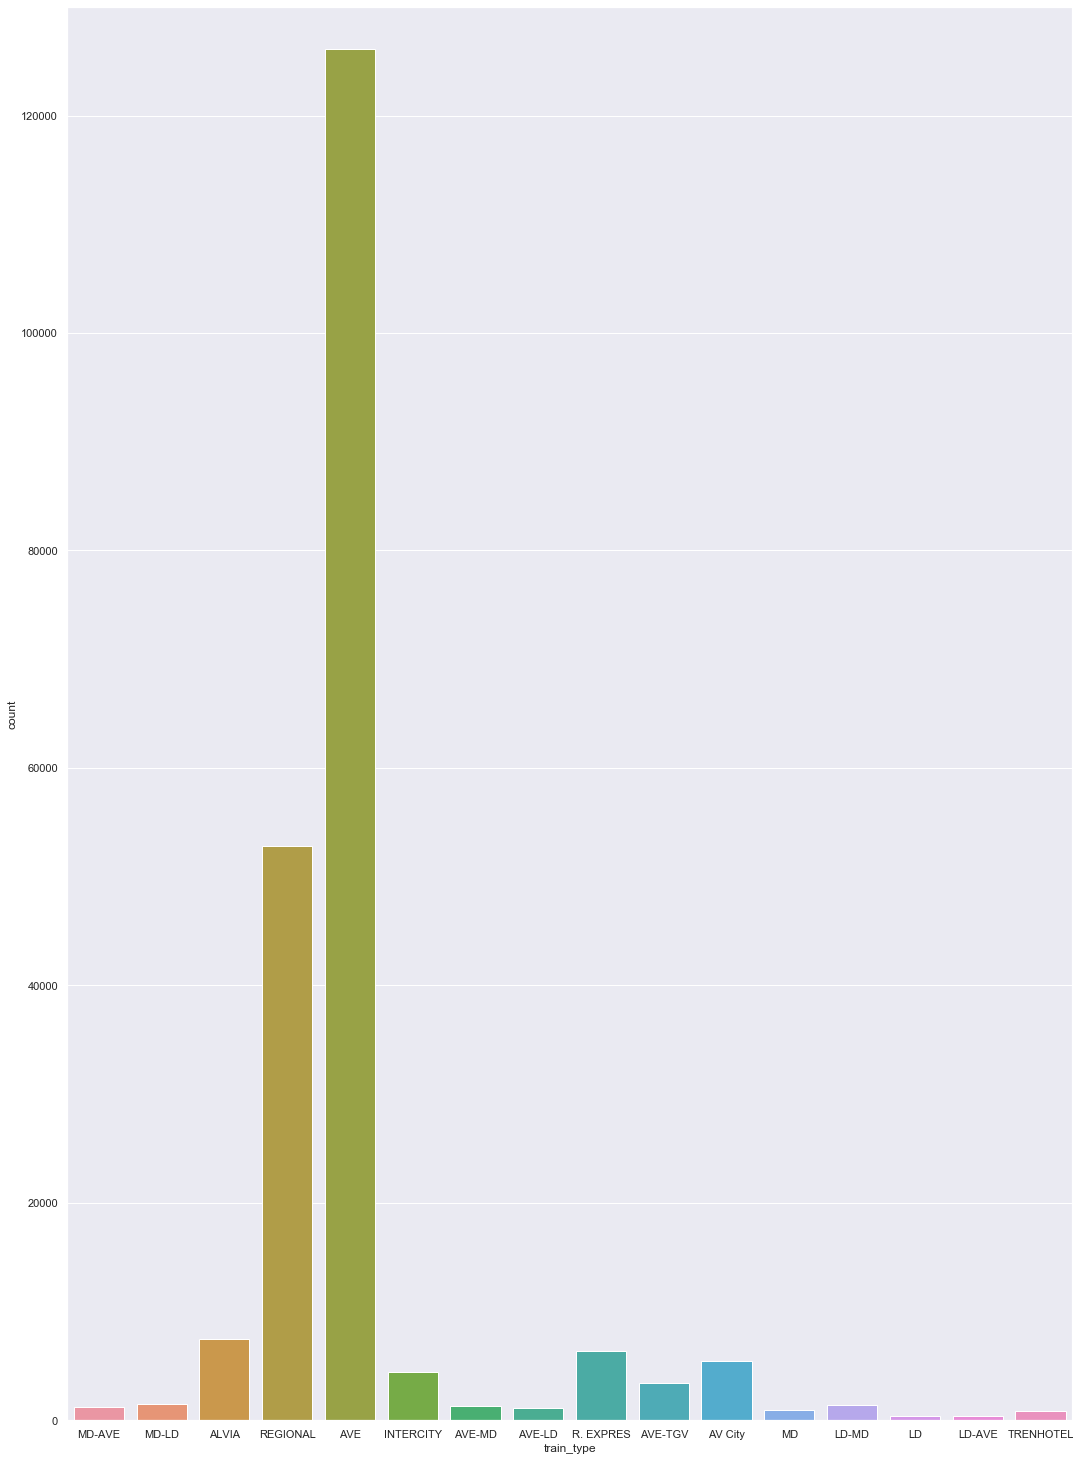

In [17]:
plt.figure(figsize=(18, 26))
plt.ylim(0, 130000)
sns.countplot(x=df['train_type'])

**Question: Which train runs the maximum in number as compared to other train types?**

**Answer:**  
 **AVE** train runs miximum in number as compared to other trains

#### Plot number of trains of different class

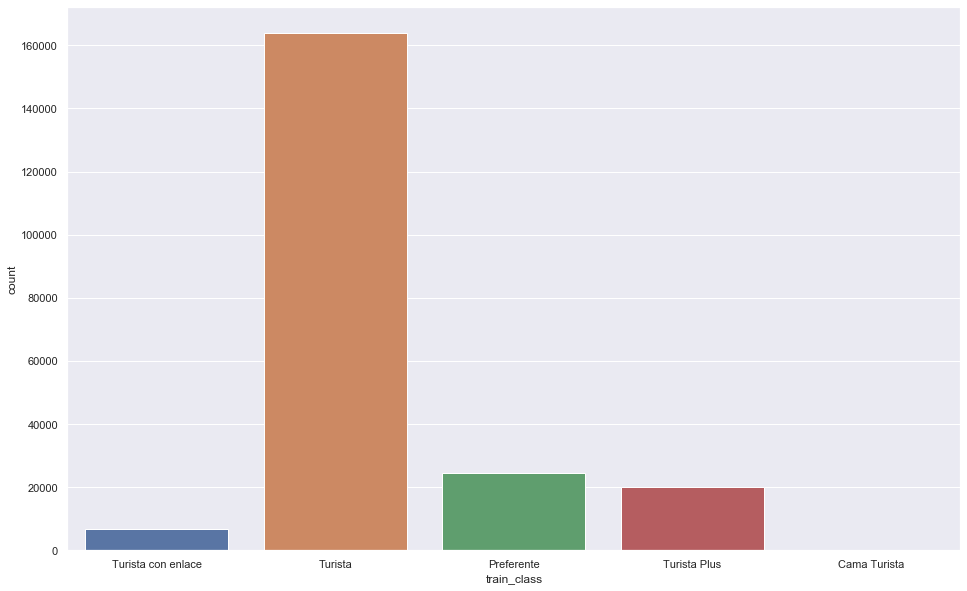

In [18]:
plt.figure(figsize=(16, 10))
sns.countplot(x=df['train_class'], data=df)

**Question: Which the most common train class for traveling among people in general?**

**Answer:**  
 **Turista** is the most used general train class

#### Plot number of tickets bought from each category

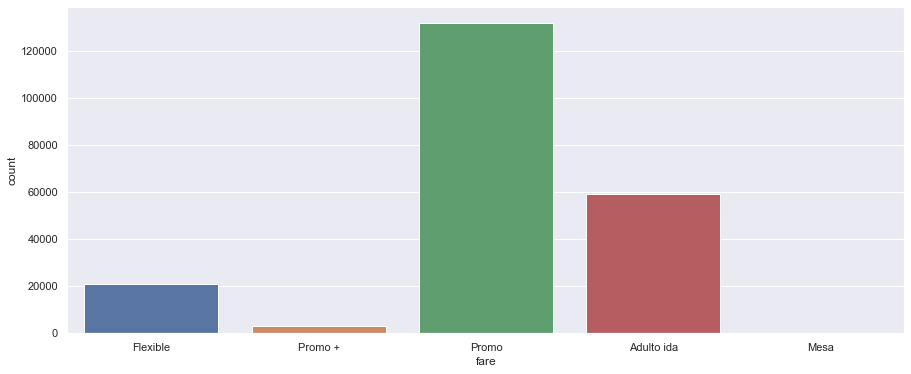

In [19]:
plt.figure(figsize=(15, 6))
sns.countplot(x='fare', data=df)

**Question: Which the most common tickets are bought?**

**Answer:**   
 **Promo fare** are the tickets which were most commenly bought 

####  Plot distribution of the ticket prices

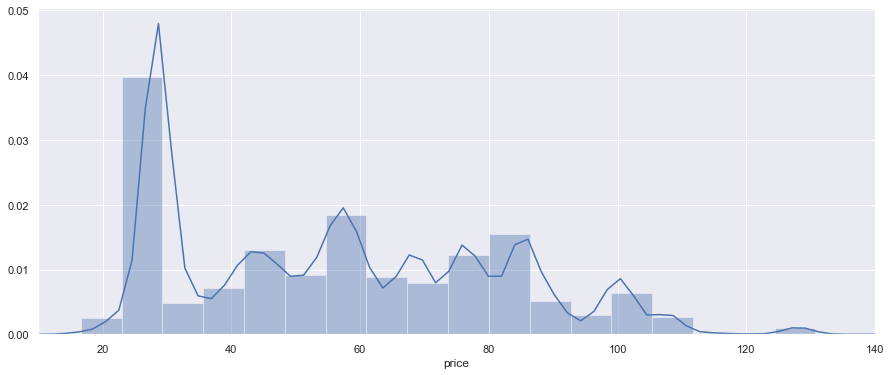

In [20]:
plt.figure(figsize=(15, 6))
plt.xlim(10, 140)
sns.distplot(df['price'], bins=30, kde=True)

**Question: What readings can you get from the above plot?**

**Answer:**        
- Tickets having price 27 to 30 are bought more than the other tickets
- After that tickets having price 56 to 60 are bought less than the above
- And the tickets having price 43 to 45 and price 83 to 85 are bought about in same number

**Show train_class vs price through boxplot**

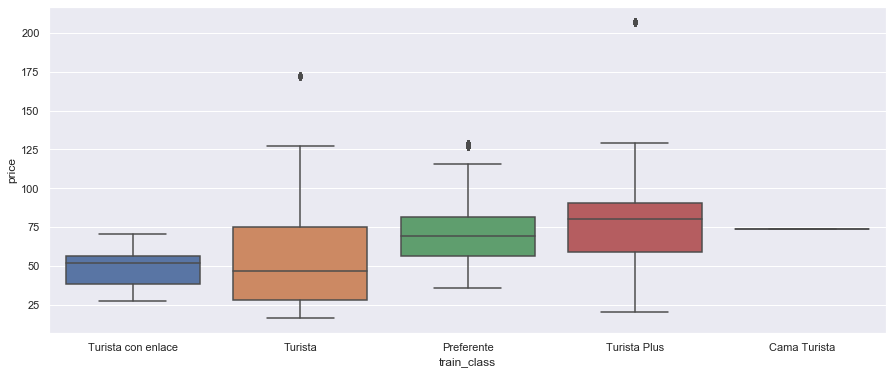

In [21]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='train_class', y='price', data=df)

**Question: What pricing trends can you find out by looking at the plot above?**

**Answer:**  
  - Turista class has price range of about 30 to 75, this class has a wide range of tickets prices
  - Turista plus are expensive than others and have a price range of about 60 to 85 
  - Cama Turista has only one ticket price which is about 74

#### Show train_type vs price through boxplot

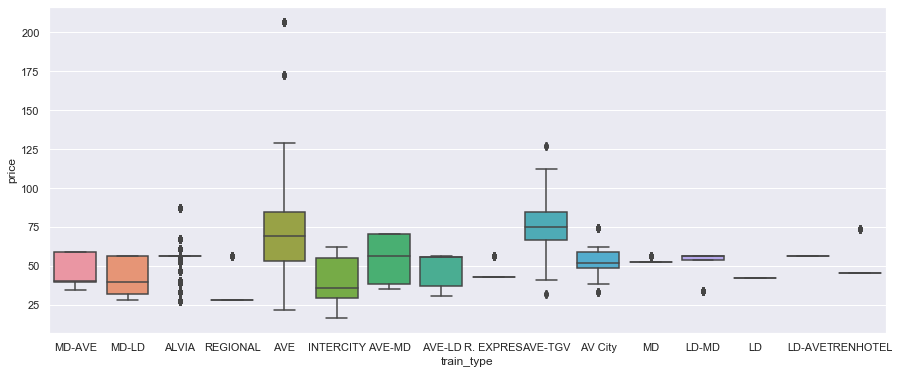

In [22]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='train_type', y='price', data=df)

**Question: Which type of trains cost more as compared to others?**

**Answer:** 
  - AVE and AVE-TGV these are the two train types which have high price tickets also than the other train types


# Feature Engineering


In [23]:
df = df.reset_index()

**Finding the travel time between the place of origin and destination**<br>
We need to find out the travel time for each entry which can be obtained from the 'start_date' and 'end_date' column. Also if you see, these columns are in object type therefore datetimeFormat should be defined to perform the necessary operation of getting the required time.

**Import datetime library**

In [24]:
import datetime

In [25]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat)- datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)                  
    

In [26]:
df['travel_time_in_hrs'] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1) 
df.head()

,index,origin,destination,start_date,end_date,train_type,price,train_class,fare,travel_time_in_hrs
0,0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible,4.700000
1,1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +,5.800000
2,2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +,5.916667
3,3,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +,4.983333
4,4,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo,4.133333


#### Remove redundant features
  - we need to remove features that are giving the related values as 'travel_time_in_hrs'
  - Removing 'start_date' and 'end_date' columns as we extracted 'travel_time_in_hrs' from it
  - To reduce the redundency

In [27]:
df.drop(['start_date', 'end_date'], axis=1, inplace=True)

In [28]:
df.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.700000
1,1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.800000
2,2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,5.916667
3,3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,4.983333
4,4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,4.133333


We now need to find out the pricing from 'MADRID' to other destinations. We also need to find out time which each train requires for travelling. 

## 1: **Travelling from MADRID to SEVILLA**

#### Findout people travelling from MADRID to SEVILLA

In [29]:
df1 = df.loc[(df.origin == 'MADRID') & (df.destination == 'SEVILLA')]
df1

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
364,364,MADRID,SEVILLA,AV City,49.150000,Turista,Promo,2.916667
365,365,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo,2.733333
366,366,MADRID,SEVILLA,AVE,69.400000,Preferente,Promo,2.633333
367,367,MADRID,SEVILLA,AVE,76.300000,Turista,Flexible,2.533333
368,368,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo,2.600000
...,...,...,...,...,...,...,...,...
215261,215904,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.633333
215262,215905,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.533333
215263,215906,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.633333
215264,215907,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.666667


#### Make a plot for finding out travelling hours for each train type

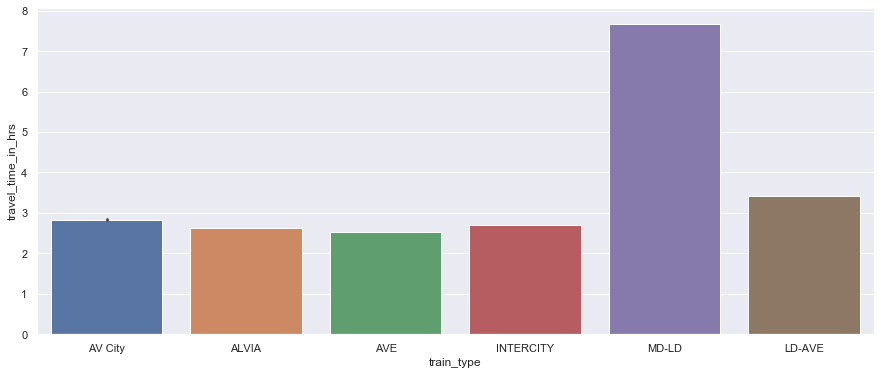

In [30]:
# We will use the above dataframe as 'df1'
plt.figure(figsize=(15, 6))
sns.barplot(x='train_type', y='travel_time_in_hrs', data=df1)

#### Show train_type vs price through boxplot

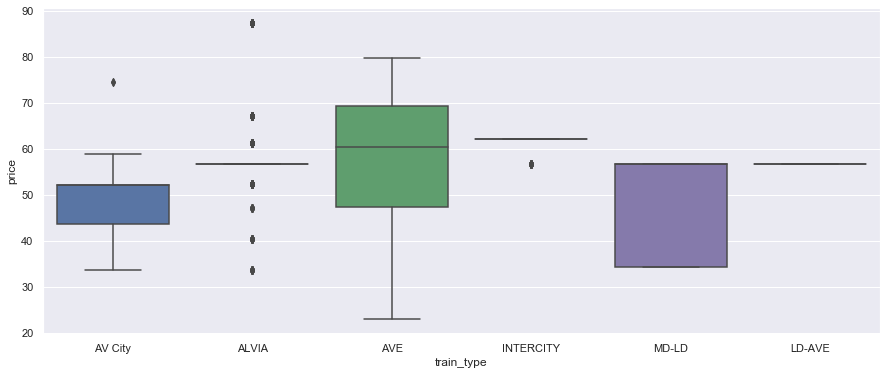

In [31]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='train_type', y='price', data=df1)

## 2: **Travelling from MADRID to BARCELONA**

#### Findout people travelling from MADRID to BARCELONA

In [32]:
df2 = df.loc[(df.origin == 'MADRID') & (df.destination == 'BARCELONA')]

#### Make a plot for finding out travelling hours for each train type

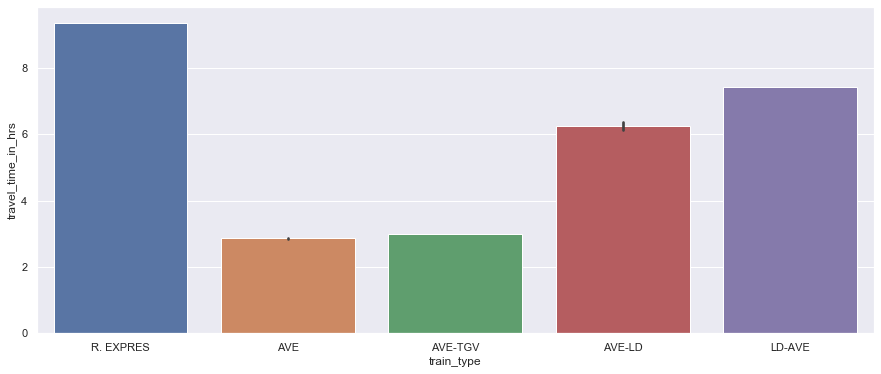

In [33]:
# We will be usign 'df2'
plt.figure(figsize=(15, 6))
sns.barplot(x='train_type', y='travel_time_in_hrs', data=df2)

#### Show train_type vs price through boxplot

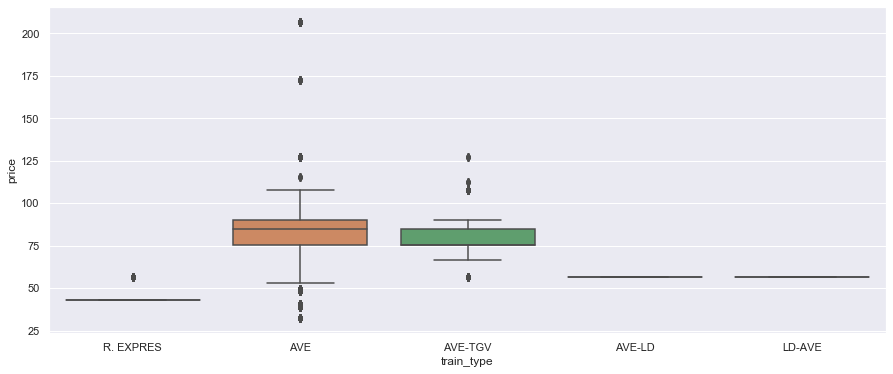

In [34]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='train_type', y='price', data=df2)

## 3: **Travelling from MADRID to VALENCIA**

#### Findout people travelling from MADRID to VALENCIA

In [35]:
df3 = df.loc[(df.origin == 'MADRID') & (df.destination == 'VALENCIA')]

#### Make a plot for finding out travelling hours for each train type

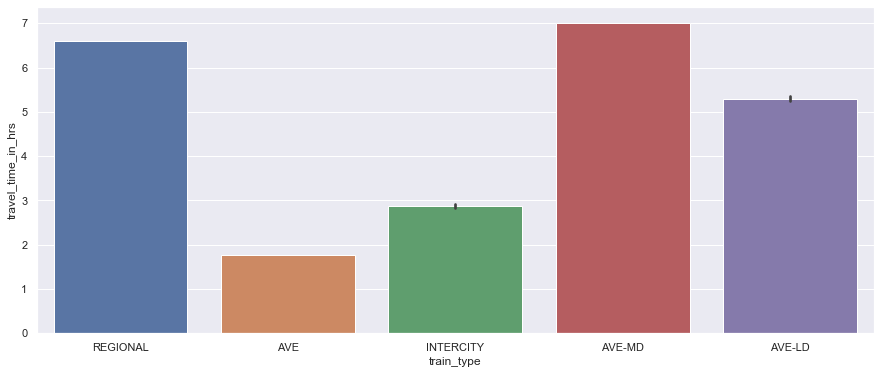

In [36]:
# We will be usign 'df3'
plt.figure(figsize=(15, 6))
sns.barplot(x='train_type', y='travel_time_in_hrs', data=df3)

#### Show train_type vs price through boxplot

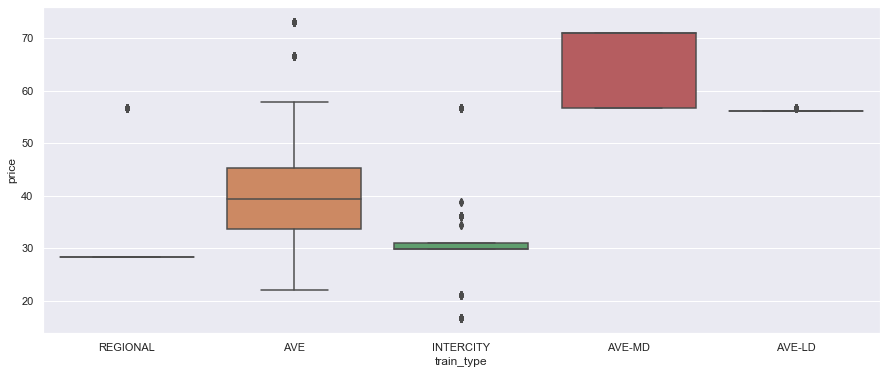

In [37]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='train_type', y='price', data=df3)

## 4: **Travelling from MADRID to PONFERRADA**

#### Findout people travelling from MADRID to PONFERRADA

In [38]:
df4 = df.loc[(df.origin == 'MADRID') & (df.destination == 'PONFERRADA')]

#### Make a plot for finding out travelling hours for each train type

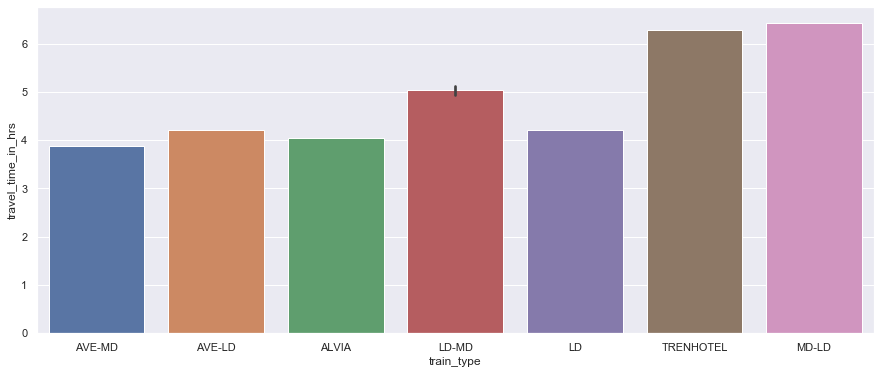

In [39]:
# We will be usign 'df4'
plt.figure(figsize=(15, 6))
sns.barplot(x='train_type', y='travel_time_in_hrs', data=df4)

#### Show train_type vs price through boxplot

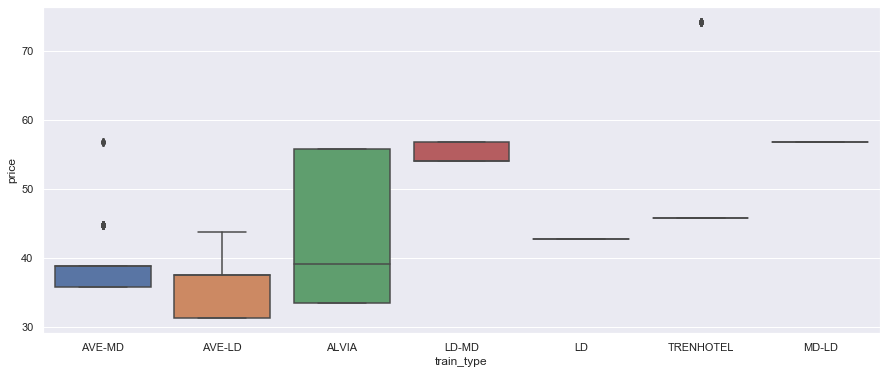

In [40]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='train_type', y='price', data=df4)

# Applying Linear  Regression

#### Import LabelEncoder library from sklearn 

In [41]:
from sklearn import preprocessing

**Data Encoding**

In [42]:
df

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.700000
1,1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.800000
2,2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,5.916667
3,3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,4.983333
4,4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,4.133333
...,...,...,...,...,...,...,...,...
215261,215904,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.633333
215262,215905,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.533333
215263,215906,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.633333
215264,215907,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.666667


In [43]:
lab_en = preprocessing.LabelEncoder()
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])
df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])

In [44]:
df.head(10)

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,2,1,11,59.50,4,1,4.700000
1,1,2,1,11,34.65,4,4,5.800000
2,2,2,1,12,39.95,4,4,5.916667
3,3,2,1,11,40.60,4,4,4.983333
4,4,2,1,0,27.90,2,3,4.133333
5,5,1,4,14,28.35,2,0,6.783333
6,6,1,4,14,28.35,2,0,6.716667
7,7,1,4,14,28.35,2,0,6.700000
8,8,1,4,14,28.35,2,0,6.583333
9,9,1,4,14,28.35,2,0,6.366667


#### Separate the dependant and independant variables

In [45]:
X = df.drop(['price'], axis=1)
Y = df[['price']]
print(X.shape)
print(Y.shape)

(215266, 7)
(215266, 1)


#### Import test_train_split from sklearn
  To split the data into train and test samples

In [46]:
from sklearn.model_selection import train_test_split

#### Splitting the data into training and test set

In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.30, random_state=25,shuffle=True)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(150686, 7) (150686, 1)
(64580, 7) (64580, 1)


#### Import LinearRegression model from sklearn

In [48]:
from sklearn.linear_model import LinearRegression

#### Make an object of LinearRegression( ) / Instantiate the model and train it using the training data sets

In [49]:
lr = LinearRegression()

In [50]:
#Training the model
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Find out the predictions using test data set.

In [51]:
lr_predict = lr.predict(X_test)

#### Find out the predictions using training data set.

In [52]:
lr_predict_train = lr.predict(X_train)

#### Checking model performance
- Import r2_score library form sklearn
- r2_score is a performance metric used to check model performance

In [53]:
from sklearn.metrics import r2_score

#### Find out the R2 Score for test data and print it

In [54]:
lr_r2_test = r2_score(Y_test,lr_predict)
print(lr_r2_test)

0.7309207961509145


#### Task 43: Find out the R2 Score for training data and print it.

In [55]:
lr_r2_train = r2_score(Y_train,lr_predict_train)
print(lr_r2_train)

0.7256800103046104


**Comaparing training and testing R2 scores**

In [56]:
print('R2 score of Linear Regression for Testing Data is: ', lr_r2_train)
print('R2 score of Linear Regression for Testing Data is: ', lr_r2_test)

R2 score of Linear Regression for Testing Data is:  0.7256800103046104
R2 score of Linear Regression for Testing Data is:  0.7309207961509145


# Applying Polynomial Regression

#### Import PolynomialFeatures from sklearn

In [57]:
from sklearn.preprocessing import PolynomialFeatures

#### Making an object of default Polynomial Features

In [58]:
# Using degree = 2
poly_reg = PolynomialFeatures(degree=2)

#### Transform the features to higher degree features.

In [59]:
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

#### Fit the transformed features to Linear Regression

In [60]:
poly_model =LinearRegression()
poly_model.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Find the predictions on the data set

In [61]:
y_train_predicted = poly_model.predict(X_train_poly)
y_test_predict = poly_model.predict(X_test_poly)

#### Task 49: Evaluate R2 score for training data set

In [62]:
r2_train = r2_score(Y_train, y_train_predicted)

#### Evaluate R2 score for test data set

In [63]:
r2_test =  r2_score(Y_test, y_test_predict)

**Comaparing training and testing R2 scores**

In [64]:
print ('The r2 score for training set is: ', r2_train)
print ('The r2 score for testing set is: ', r2_test)

The r2 score for training set is:  0.8226205944906804
The r2 score for testing set is:  0.8230804451948531


## Model Selection
 - **Question: Which model gives the best result for price prediction? Find out the complexity using R2 score and give your answer.**<br>
 - **Usin for loop for finding the best degree and model complexity for polynomial regression model**

In [65]:
r2_train=[]
r2_test=[]
for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly = poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)
    poly = LinearRegression()
    poly.fit(X_tr_poly, Y_train)
   
    y_tr_predicted,y_tst_predict = poly.predict(X_tr_poly),poly.predict(X_tst_poly)
    r2_train.append(r2_score(Y_train, y_tr_predicted))
    r2_test.append(r2_score(Y_test, y_tst_predict))
    
print ('R2 Train', r2_train)
print ('R2 Test', r2_test)

R2 Train [0.7256800103046104, 0.8226205944906804, 0.8132933222463604, 0.7207282160413204, 0.5689049747358359]
R2 Test [0.7309207961509151, 0.8230804451948531, 0.8146637651741153, 0.7228879804226224, 0.5758291335966729]


#### Plotting the model

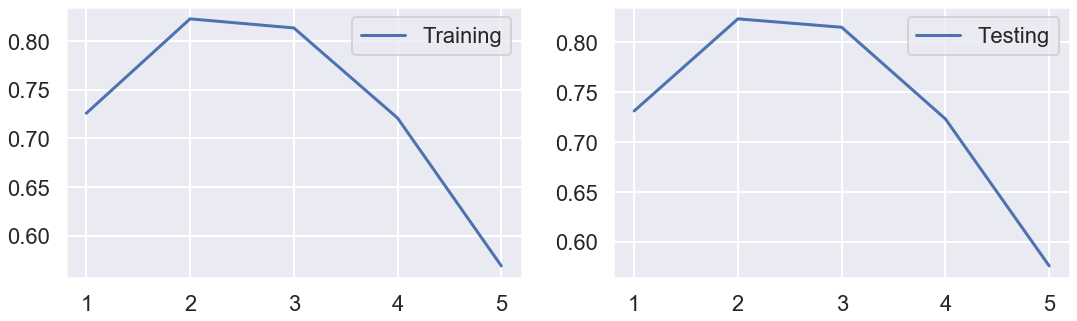

In [66]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training');
plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing');

**Choosing Model**
 - If you look at Degree two (2) polynomial the traning and testing r2_scores both are good at this Degree
 - When we are increasing the degree (making the model more complex), the model starts in decreasing both the training and testing r2_scores
 - Thus we will consider the degree two (2) polynomial at this point 